# Sentiment Analysis for Movie Ratings in IMDB
This project outlines different methodologies to analyse the sentiment analysis for movies in the movie rating platform IMBD. Different models and methods will be used in this project to analyse the reviews from the users.

## Description:
The dataset is comprised of tab-separated files with phrases from the Rotten Tomatoes dataset. The train/test split has been preserved for the purposes of benchmarking, but the sentences have been shuffled from their original order. Each Sentence has been parsed into many phrases by the Stanford parser. Each phrase has a PhraseId. Each sentence has a SentenceId. Phrases that are repeated (such as short/common words) are only included once in the data.

train.tsv contains the phrases and their associated sentiment labels. We have additionally provided a SentenceId so that you can track which phrases belong to a single sentence.
test.tsv contains just phrases. You must assign a sentiment label to each phrase.
The sentiment labels are:

0 - negative
1 - somewhat negative
2 - neutral
3 - somewhat positive
4 - positive

The dataset can be downloaded here: https://archive.ics.uci.edu/ml/datasets/spambase

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
plt.style.use('ggplot')

df = pd.read_csv('movie.csv')
df=df.reset_index().rename(columns={'index':'Id'})

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
df.head(10)

,Id,text,label
0,0,I grew up (b. 1965) watching and loving the Th...,0
1,1,"When I put this movie in my DVD player, and sa...",0
2,2,Why do people who do not know what a particula...,0
3,3,Even though I have great interest in Biblical ...,0
4,4,Im a die hard Dads Army fan and nothing will e...,1
5,5,A terrible movie as everyone has said. What ma...,0
6,6,Finally watched this shocking movie last night...,1
7,7,I caught this film on AZN on cable. It sounded...,0
8,8,It may be the remake of 1987 Autumn's Tale aft...,1
9,9,My Super Ex Girlfriend turned out to be a plea...,1


In [3]:
df['text'][0]

'I grew up (b. 1965) watching and loving the Thunderbirds. All my mates at school watched. We played "Thunderbirds" before school, during lunch and after school. We all wanted to be Virgil or Scott. No one wanted to be Alan. Counting down from 5 became an art form. I took my children to see the movie hoping they would get a glimpse of what I loved as a child. How bitterly disappointing. The only high point was the snappy theme tune. Not that it could compare with the original score of the Thunderbirds. Thankfully early Saturday mornings one television channel still plays reruns of the series Gerry Anderson and his wife created. Jonatha Frakes should hand in his directors chair, his version was completely hopeless. A waste of film. Utter rubbish. A CGI remake may be acceptable but replacing marionettes with Homo sapiens subsp. sapiens was a huge error of judgment.'

<Axes: title={'center': 'Count of reviews by positive or negative'}, xlabel='label'>

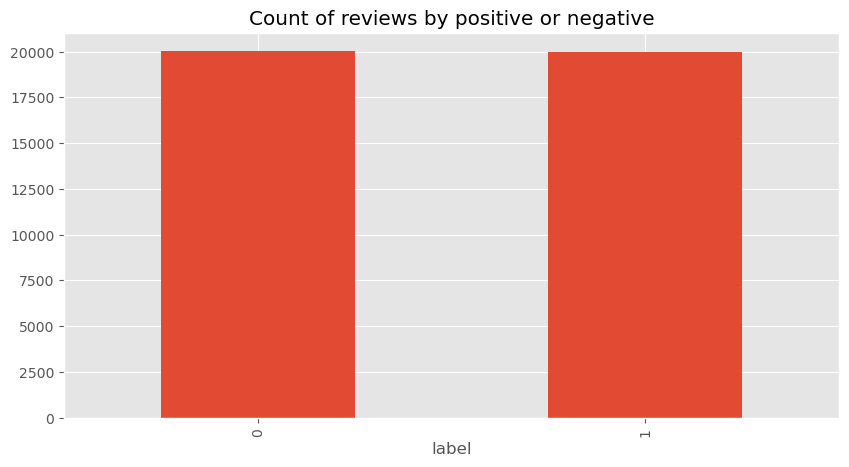

In [4]:
df['label'].value_counts().plot(kind='bar',title='Count of reviews by positive or negative',figsize=(10,5))

In [5]:
# Grab an example 

example=df['text'].values[500]

In [6]:
tokens=nltk.word_tokenize(example)

In [7]:
# Part taggs of speech for each word
tagged=nltk.pos_tag(tokens)

In [8]:
entities=nltk.chunk.ne_chunk(tagged)
entities.pprint()

(S
  Just/RB
  because/IN
  an/DT
  event/NN
  really/RB
  happened/VBD
  does/VBZ
  n't/RB
  mean/VB
  that/IN
  it/PRP
  will/MD
  make/VB
  a/DT
  good/JJ
  screenplay//NN
  movie/NN
  ./.
  The/DT
  (ORGANIZATION Cat/NNP)
  's/POS
  (PERSON Meow/NNP)
  ,/,
  by/IN
  (PERSON Peter/NNP Bogdanovich/NNP)
  claims/VBZ
  to/TO
  be/VB
  based/VBN
  on/IN
  actual/JJ
  events/NNS
  which/WDT
  happened/VBD
  on/IN
  a/DT
  cruise/NN
  hosted/VBN
  by/IN
  (PERSON William/NNP Randolph/NNP Hurst/NNP)
  ./.
  The/DT
  writer/NN
  paid/VBD
  more/JJR
  attention/NN
  to/TO
  creating/VBG
  a/DT
  bizarre/JJ
  cast/NN
  of/IN
  characters/NNS
  than/IN
  taking/VBG
  time/NN
  to/TO
  create/VB
  a/DT
  story/NN
  for/IN
  the/DT
  bizarre/JJ
  characters/NNS
  to/TO
  inhabit/VB
  ./.
  The/DT
  key/JJ
  moments/NNS
  of/IN
  the/DT
  story/NN
  seem/VBP
  implausible/JJ
  ;/:
  for/IN
  example/NN
  ,/,
  when/WRB
  (PERSON Hurst/NNP)
  accidentally/RB
  shoots/VBZ
  the/DT
  producer/NN
  ,

Label column is a binary classification of the sentiment 0 for negative 1 for positive.

# Traditional NLP VADER
- Valence Aware Dictionary and sEntiment Reasoner - Bag of words
- This approach does not identify relation between words and its significance

In [9]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm
nltk.download('vader_lexicon')
sia=SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\tmara\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [10]:
sia.polarity_scores("I'm so happy!")

{'neg': 0.0, 'neu': 0.318, 'pos': 0.682, 'compound': 0.6468}

In [11]:
sia.polarity_scores('This is the worst thing ever!')

{'neg': 0.468, 'neu': 0.532, 'pos': 0.0, 'compound': -0.6588}

In [12]:
sia.polarity_scores(example)

{'neg': 0.174, 'neu': 0.706, 'pos': 0.12, 'compound': -0.8723}

In [13]:
res={}
id=0
for i,row in tqdm(df.iterrows(),total=len(df)):
    text=row['text']
    myid=id
    res[myid]=sia.polarity_scores(text)
    id+=1

  0%|          | 0/40000 [00:00<?, ?it/s]

In [14]:
vaders=pd.DataFrame(res).T
vaders=vaders.reset_index().rename(columns={'index':'Id'})
vaders =vaders.merge(df,how='left')
vaders.head(10)

,Id,neg,neu,pos,compound,text,label
0,0,0.084,0.780,0.136,0.6502,I grew up (b. 1965) watching and loving the Th...,0
1,1,0.098,0.755,0.147,0.9314,"When I put this movie in my DVD player, and sa...",0
2,2,0.116,0.848,0.036,-0.9568,Why do people who do not know what a particula...,0
3,3,0.204,0.656,0.140,-0.7515,Even though I have great interest in Biblical ...,0
4,4,0.066,0.839,0.095,0.7469,Im a die hard Dads Army fan and nothing will e...,1
5,5,0.117,0.755,0.128,0.2890,A terrible movie as everyone has said. What ma...,0
6,6,0.111,0.762,0.127,0.7460,Finally watched this shocking movie last night...,1
7,7,0.092,0.763,0.145,0.9156,I caught this film on AZN on cable. It sounded...,0
8,8,0.077,0.742,0.180,0.9689,It may be the remake of 1987 Autumn's Tale aft...,1
9,9,0.081,0.649,0.270,0.9974,My Super Ex Girlfriend turned out to be a plea...,1


Now we are going to see if the VADERS polarity scores allign with the label set to each review

Text(0.5, 1.0, 'Compund Score by Positive/ Negative labelling')

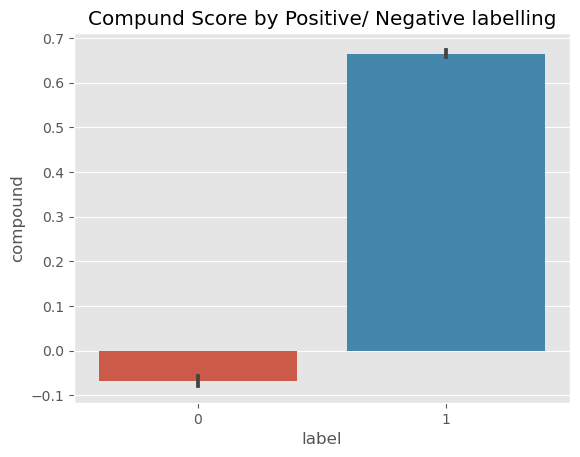

In [15]:
ax=sns.barplot(data=vaders,x='label',y='compound')
ax.set_title('Compund Score by Positive/ Negative labelling')

From this result we can check that the compound score is providing a good and correcct insight into the positive and negative labelling which validates the analysis. Nevertheless, the compound shows a much higher average for positive labeled reviews than negative. This indicates that the model is showing a correct trend but is still unsecurely showing more bias towards positve reviews when there are equal amounts of positive and negative reviews.

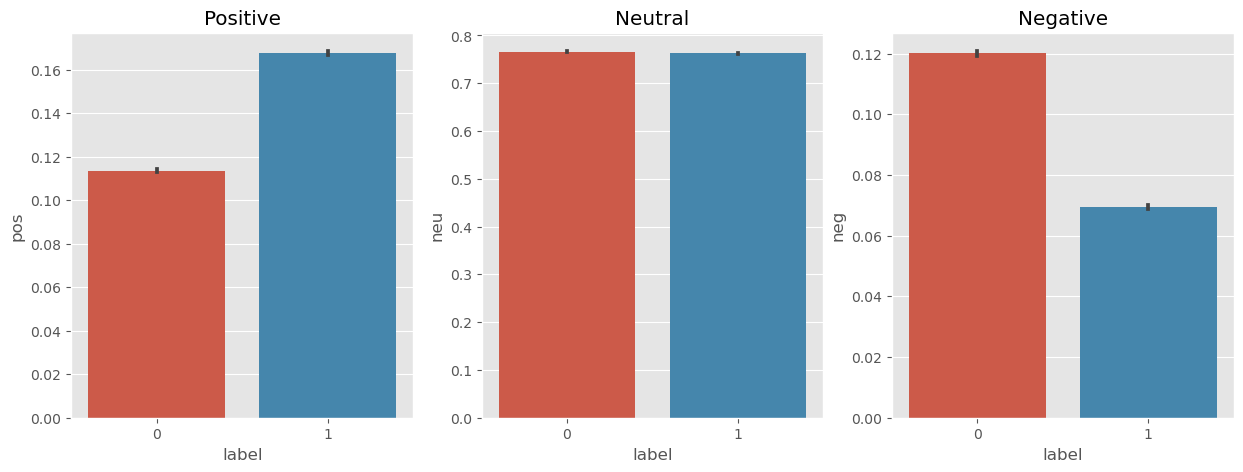

In [16]:
fig,axs=plt.subplots(1,3,figsize=(15,5))
sns.barplot(data=vaders,x='label',y='pos',ax=axs[0])
sns.barplot(data=vaders,x='label',y='neu',ax=axs[1])
sns.barplot(data=vaders,x='label',y='neg',ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')

plt.show()

In [17]:
vaders.columns

Index(['Id', 'neg', 'neu', 'pos', 'compound', 'text', 'label'], dtype='object')

The figure above shows that the classification is representing a correct trend for the positive, neutral and negative classification.

In [18]:
correlation_matrix=vaders[['neg', 'neu', 'pos', 'compound','label']].corr()

<Axes: >

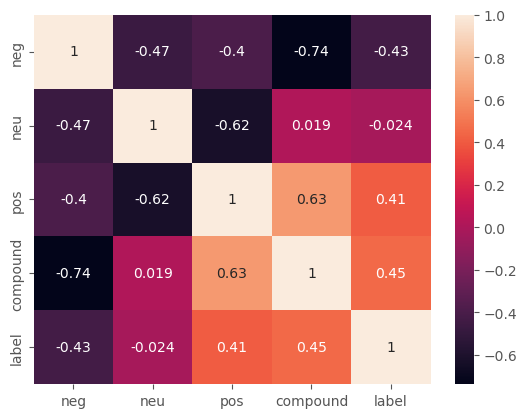

In [19]:
sns.heatmap(correlation_matrix,annot=True)

# Roberta pretrained model

In [20]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [21]:
# Trained Model
MODEL=f"cardiffnlp/twitter-roberta-base-sentiment"
tokeniser=AutoTokenizer.from_pretrained(MODEL)
model=AutoModelForSequenceClassification.from_pretrained(MODEL)

c:\Users\tmara\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\tmara\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [23]:
print(example)
sia.polarity_scores(example)

Just because an event really happened doesn't mean that it will make a good screenplay/ movie. The Cat's Meow, by Peter Bogdanovich claims to be based on actual events which happened on a cruise hosted by William Randolph Hurst. The writer paid more attention to creating a bizarre cast of characters than taking time to create a story for the bizarre characters to inhabit. The key moments of the story seem implausible; for example, when Hurst accidentally shoots the producer, believing him to be Chaplin. Basing a key element of a story on someone wearing the wrong hat is trite and contrived. The story attempts to be a dark comedy, but The Cat's Meow misses an important piece of this equation, comedy. There is also a lack of empathy for any of the characters. It hardly matters who is shot, who is killed, who is guilty and who is innocent. There is not a strong character to cheer for. As a result the conflicts are difficult to care about and the eventual outcome is incidental.


{'neg': 0.174, 'neu': 0.706, 'pos': 0.12, 'compound': -0.8723}

In [27]:
# Run for Roberta Model
print(example)
encoded_text=tokeniser(example,return_tensors='pt')
output= model(**encoded_text)
scores=output[0][0].detach().numpy()
scores=softmax(scores)
scores_dict={
    'roberta_neg':scores[0],
    'roberta_neu':scores[1],
    'roberta_pos':scores[2]
}
print(scores_dict)

Just because an event really happened doesn't mean that it will make a good screenplay/ movie. The Cat's Meow, by Peter Bogdanovich claims to be based on actual events which happened on a cruise hosted by William Randolph Hurst. The writer paid more attention to creating a bizarre cast of characters than taking time to create a story for the bizarre characters to inhabit. The key moments of the story seem implausible; for example, when Hurst accidentally shoots the producer, believing him to be Chaplin. Basing a key element of a story on someone wearing the wrong hat is trite and contrived. The story attempts to be a dark comedy, but The Cat's Meow misses an important piece of this equation, comedy. There is also a lack of empathy for any of the characters. It hardly matters who is shot, who is killed, who is guilty and who is innocent. There is not a strong character to cheer for. As a result the conflicts are difficult to care about and the eventual outcome is incidental.
{'roberta_n

In [28]:
def polarity_scores_roberta(example):
    encoded_text=tokeniser(example,return_tensors='pt')
    output= model(**encoded_text)
    scores=output[0][0].detach().numpy()
    scores=softmax(scores)
    scores_dict={
        'roberta_neg':scores[0],
        'roberta_neu':scores[1],
        'roberta_pos':scores[2]
    }
    return scores_dict

In [39]:
res={}
id=0
df=df.iloc[:50].copy()
for i,row in tqdm(df.iterrows(),total=len(df)):
    try:
        text=row['text']
        myid=row['Id']
        vader_results=sia.polarity_scores(text)
        vader_result_rename={}
        for key,value in vader_results.items():
            vader_result_rename[f"vader_{key}"]=value
        roberta_results=polarity_scores_roberta(text)
        
        both={**vader_result_rename ,**roberta_results}
        res[myid]=both
        id+=1
    except RuntimeError:
        print(f"Broke for id {myid}")

  0%|          | 0/50 [00:00<?, ?it/s]

Broke for id 16
Broke for id 25
Broke for id 37
Broke for id 39
Broke for id 46


In [40]:
res

{0: {'vader_neg': 0.084,
  'vader_neu': 0.78,
  'vader_pos': 0.136,
  'vader_compound': 0.6502,
  'roberta_neg': 0.5411444,
  'roberta_neu': 0.30811554,
  'roberta_pos': 0.15074018},
 1: {'vader_neg': 0.098,
  'vader_neu': 0.755,
  'vader_pos': 0.147,
  'vader_compound': 0.9314,
  'roberta_neg': 0.4152739,
  'roberta_neu': 0.41993025,
  'roberta_pos': 0.16479585},
 2: {'vader_neg': 0.116,
  'vader_neu': 0.848,
  'vader_pos': 0.036,
  'vader_compound': -0.9568,
  'roberta_neg': 0.8023978,
  'roberta_neu': 0.17421685,
  'roberta_pos': 0.023385404},
 3: {'vader_neg': 0.204,
  'vader_neu': 0.656,
  'vader_pos': 0.14,
  'vader_compound': -0.7515,
  'roberta_neg': 0.9631282,
  'roberta_neu': 0.032477878,
  'roberta_pos': 0.004393961},
 4: {'vader_neg': 0.066,
  'vader_neu': 0.839,
  'vader_pos': 0.095,
  'vader_compound': 0.7469,
  'roberta_neg': 0.038619325,
  'roberta_neu': 0.20298481,
  'roberta_pos': 0.7583959},
 5: {'vader_neg': 0.117,
  'vader_neu': 0.755,
  'vader_pos': 0.128,
  'vade

In [41]:
results_df=pd.DataFrame(res).T
results_df=results_df.reset_index().rename(columns={'index':'Id'})
results_df=results_df.merge(df,how='left')

In [42]:
results_df.columns


Index(['Id', 'vader_neg', 'vader_neu', 'vader_pos', 'vader_compound',
       'roberta_neg', 'roberta_neu', 'roberta_pos', 'text', 'label'],
      dtype='object')

c:\Users\tmara\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


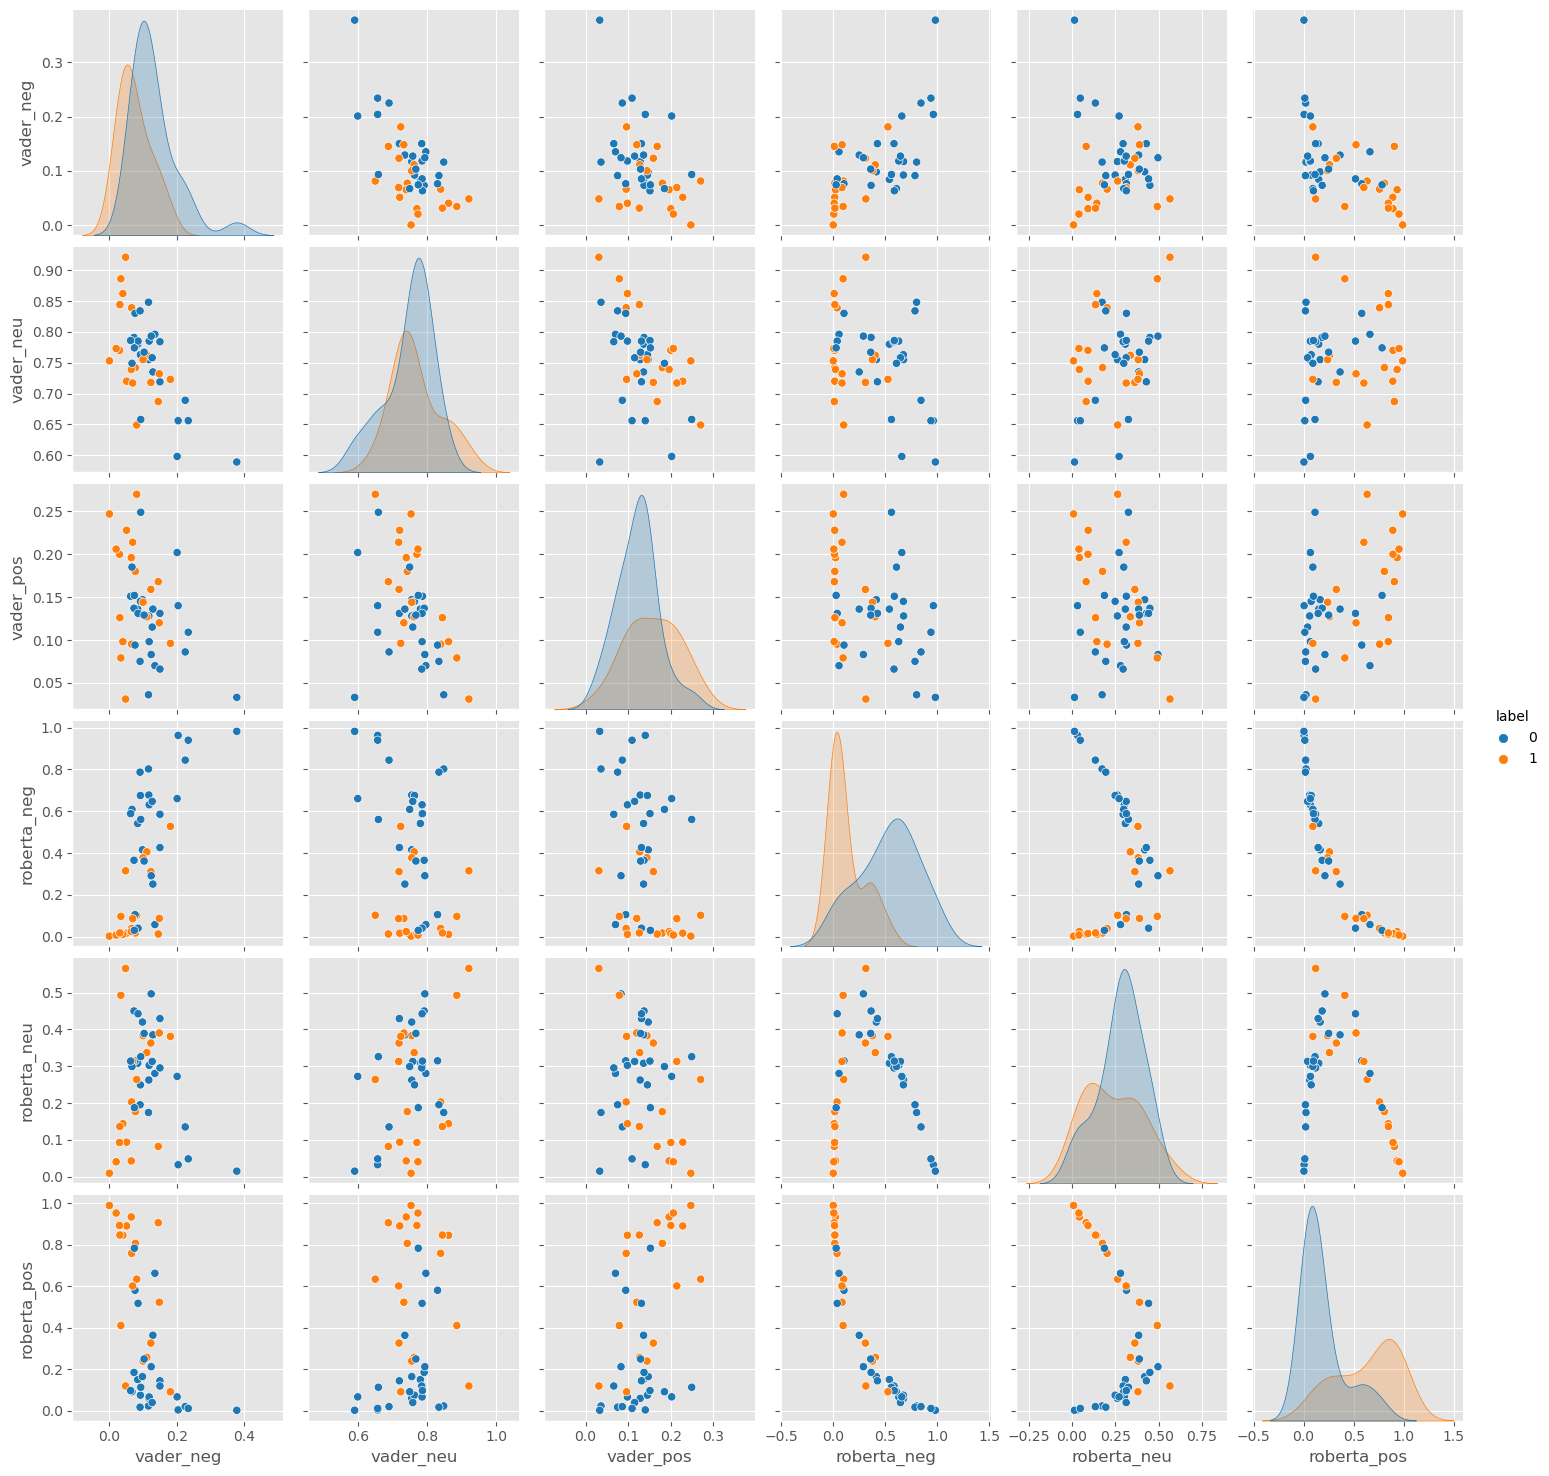

In [43]:
sns.pairplot(data=results_df,vars=['vader_neg', 'vader_neu', 'vader_pos','roberta_neg', 'roberta_neu', 'roberta_pos' ],hue='label',palette='tab10')
plt.show()

In [45]:
results_df.query('label==0').sort_values('roberta_pos',ascending=False)['text'].values[0]

'I like Brad Pitt enormously. He is an actor with brains and wit, not to mention face, pectorals and all the rest. Since I saw him in "Thelma and Louise" a thought has been bothering me, who does he remind me of? "Troy" did it for me. He is the new Brigitte Bardot. The differences are obvious of course. Male, American etc but Brigitte Bardot comes to mind nonetheless. He is so beautiful that he is at his most effective when he plays against it. "Kalifornia" "12 Monkeys" "Fight Club" "Snatch" His self deprecating humor makes him human, almost accessible. Fortunately "Troy" will soon be forgotten. Only still photographs with Pitt, semi naked in ravishing sprint positions will decorate the walls of legions of salivating fans. Strange, "Das Boot" is one of the great films of the second part of the 20th Century. What is Wolfgang Petersen doing directing this? Well, I suppose it would be very hard to say no at the chance of working with the new Brigitte Bardot.'

Model is getting confused above because the sarcasm

In [47]:
results_df.query('label==0').sort_values('vader_pos',ascending=False)['text'].values[0]

'How could they take such a beautifully animated gem like Don Bluth\'s All Dogs go to Heaven and bastardize it with a charmless, cheesy, uninspired sequel. The haunting music and delightful characters are gone, now replaced with tacky animation and an unimaginative plot.<br /><br />The Pros: Charlie Sheen is sometimes fun as Charlie, but he lacks the charming tough guy attitude that brought him to life by Burt Reynolds. I did particularly enjoy the songs "I will always be with you" and "It\'s too Heavenly here".<br /><br />The Cons: There seems to be no connection between this and the original. In the beginning Charlie is chums with Carface, but wait a minute. Isn\'t this the same character who was responsible for Charlie\'s murder and kidnapped the sweet little orphan he loved? I guess that all changes in Heaven but why isn\'t Anne-Marie even mentioned? If Itchy makes it to Heaven, wouldn\'t Flo and Killer make it too? What is with Annabelle the whippet\'s voice? In the original it so

In [49]:
results_df.query('label==1').sort_values('roberta_neg',ascending=False)['text'].values[0]

'The movie was certainly true to the real life story on which it was based. It was hard for me to find newspaper articles about the actual facts, but when I located them, I could see that truth, in this case, was stranger than fiction. Judith Light was frighteningly evil in her role as the mother in this movie, so much so that it was difficult to separate her from the role, the mark I think of an excellent performance. Rick Schroder was appropriately clueless as her son who also defended her in court, an example of how hard it can be in some circumstances for a child to accept the actions of a parent, no matter how criminal they may be. One can find fault with the movie, but not with its treatment of the reality on which it was based.'

In [50]:
results_df.query('label==1').sort_values('vader_neg',ascending=False)['text'].values[0]

'The movie was certainly true to the real life story on which it was based. It was hard for me to find newspaper articles about the actual facts, but when I located them, I could see that truth, in this case, was stranger than fiction. Judith Light was frighteningly evil in her role as the mother in this movie, so much so that it was difficult to separate her from the role, the mark I think of an excellent performance. Rick Schroder was appropriately clueless as her son who also defended her in court, an example of how hard it can be in some circumstances for a child to accept the actions of a parent, no matter how criminal they may be. One can find fault with the movie, but not with its treatment of the reality on which it was based.'

In [51]:
results_df

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,text,label
0,0,0.084,0.780,0.136,0.6502,0.541144,0.308116,0.150740,I grew up (b. 1965) watching and loving the Th...,0
1,1,0.098,0.755,0.147,0.9314,0.415274,0.419930,0.164796,"When I put this movie in my DVD player, and sa...",0
2,2,0.116,0.848,0.036,-0.9568,0.802398,0.174217,0.023385,Why do people who do not know what a particula...,0
3,3,0.204,0.656,0.140,-0.7515,0.963128,0.032478,0.004394,Even though I have great interest in Biblical ...,0
4,4,0.066,0.839,0.095,0.7469,0.038619,0.202985,0.758396,Im a die hard Dads Army fan and nothing will e...,1
5,5,0.117,0.755,0.128,0.2890,0.677496,0.262518,0.059986,A terrible movie as everyone has said. What ma...,0
6,6,0.111,0.762,0.127,0.7460,0.405400,0.336937,0.257662,Finally watched this shocking movie last night...,1
7,7,0.092,0.763,0.145,0.9156,0.675299,0.249385,0.075316,I caught this film on AZN on cable. It sounded...,0
8,8,0.077,0.742,0.180,0.9689,0.016769,0.176673,0.806559,It may be the remake of 1987 Autumn's Tale aft...,1
9,9,0.081,0.649,0.270,0.9974,0.101862,0.264063,0.634075,My Super Ex Girlfriend turned out to be a plea...,1


In [52]:
#Left to do checck the accuracy by comparing the label to the results from vader and roberta